## IMPORTING LIBRARIES AND LOADING DATA


In [58]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
size=56
DATADIR="/content/drive/MyDrive/datasets/tran_img"#pass of train image
DATADIR1="/content/drive/MyDrive/datasets/test_img"#pass of test and validat image
CATEGORIES=["1","2","3","4","5","6","7","8","9","10"]


In [59]:
traning_data = []#create training data
def create_training_data():
    for cate in CATEGORIES:
        path = os.path.join(DATADIR, cate)
        class_num = CATEGORIES.index(cate)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size,size))
                traning_data.append([new_array , class_num])
            except Exception as e:
                pass

create_training_data()

test_data = []#create test and valid data
valid_data = [] 
def create_testing_data():
  for cate in CATEGORIES:
    path = os.path.join(DATADIR1,cate)
    class_num = CATEGORIES.index(cate)
    cnt=0
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (size,size))
        if cnt <= 100:
          traning_data.append([new_array , class_num])
        elif cnt>=400:
          valid_data.append([new_array , class_num])
        else:
          test_data.append([new_array , class_num])
        cnt=cnt+1
      except Exception as e:
        pass
create_testing_data()

In [60]:
xTrain = []
yTrain = []
xVal = []
yVal = []
xTest = []
yTest = []
import random 
random.shuffle(traning_data)
random.shuffle(test_data)
random.shuffle(valid_data)
def stor(x,y,z):
  for feature, label in z:
    x.append(feature)
    y.append(label)
stor(xTrain,yTrain,traning_data)
stor(xVal,yVal,valid_data)
stor(xTest,yTest,test_data)
#converting to array
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xVal = np.array(xVal)
yVal = np.array(yVal)
xTest = np.array(xTest)
yTest = np.array(yTest) 
# xTrain, xVal, xTest = xTrain/255., xVal/255., xTest/255.#normalize

In [71]:
classesName = ["airplane", "bird", "car", "cat", "deer",
               "dog", "horse", "monkey", "ship", "truck"]
xTrain.shape

(5000, 1296)

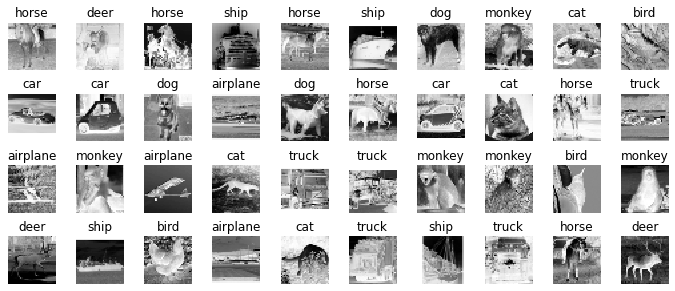

In [62]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(xTrain[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classesName[yTrain[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

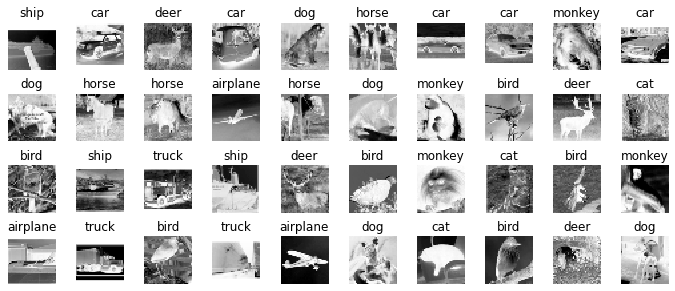

In [63]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(xVal[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classesName[yVal[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

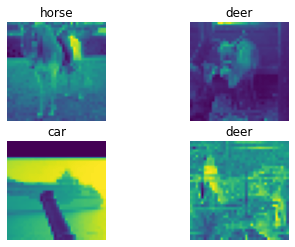

In [64]:
# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(xTrain[0])
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1])
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0])
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(xTest[0])
plt.axis('off')
plt.title(classesName[yTest[0]])
# plt.savefig(baseDir+'svm0.png')
# plt.clf()
plt.show()
# print(xTrain[0])

In [65]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(5000, 36, 36)
(5000,)
(5000, 1296)
[103 114 123 ...  99  87  85]
(5000, 1296)
[-0.19215686 -0.10588235 -0.03529412 ... -0.22352941 -0.31764706
 -0.33333333]




## SVM Linear Kernel

In [54]:
from sklearn import svm
def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)

    svc.fit(xTrain, yTrain) 

    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))

    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))

Train Accuracy = 0.366400
Test Accuracy = 0.141600
Train Accuracy = 0.569600
Test Accuracy = 0.150800
Train Accuracy = 0.970600
Test Accuracy = 0.164200
Train Accuracy = 1.000000
Test Accuracy = 0.181800
Train Accuracy = 1.000000
Test Accuracy = 0.181800
Train Accuracy = 1.000000
Test Accuracy = 0.181800
Train Accuracy = 1.000000
Test Accuracy = 0.181800


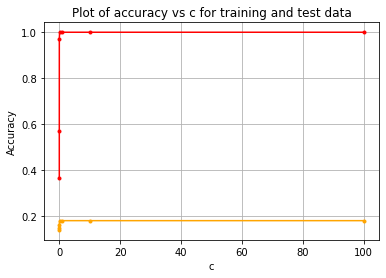

In [11]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

## SVM Polynomial Kernel

In [12]:
acc_train_svm_poly = []
acc_test_svm_poly = []

def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)


    svc_polynomial.fit(xTrain, yTrain) 

    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(xTrain)
    acc_train = np.mean(Yhat_svc_polynomial_train == yTrain)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))

    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(xVal)
    acc_test = np.mean(Yhat_svc_polynomial_test == yVal)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))

In [ ]:
c_svm_poly = [0.0001,0.001,0.01,0.1,1,10,100]


for c in c_svm_poly:
    svm_polynomial(c)

plt.plot(c_svm_poly, acc_train_svm_poly,'.-',color='red')
plt.plot(c_svm_poly, acc_test_svm_poly,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

## SVM RBF Kernel

In [ ]:
def svm_rbf(c, g):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(xTrain)
    acc = np.mean(Yhat_svc_rbf_train == yTrain)
    print('Train Accuracy = {0:f}'.format(acc))
    acc_train_svm_rbf.append(acc)
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(xVal)
    acc = np.mean(Yhat_svc_rbf_test == yVal)
    print('Test Accuracy = {0:f}'.format(acc))
    acc_test_svm_rbf.append(acc)

In [ ]:
acc_train_svm_rbf= []
acc_test_svm_rbf = []
c_svm_rbf = [0.0001,0.001,0.01,0.1,1,10,100]

for c in c_svm_rbf:
     svm_rbf(c, 'auto')
    
plt.plot(c_svm_rbf, acc_train_svm_rbf,'.-',color='red')
plt.plot(c_svm_rbf, acc_test_svm_rbf,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()
    

## SUMMARIZING RESULTS FOR THE 3 KERNELS

In [ ]:
print("SVM Linear Training Accuracy = ", acc_train_svm_linear)
print("SVM Polynomial Training Accuracy = ", acc_train_svm_poly)
print("SVM RBF Training Accuracy = ", acc_train_svm_rbf)
print("SVM Linear Test Accuracy = ", acc_test_svm_linear)
print("SVM Polynomial Test Accuracy = ", acc_test_svm_poly)
print("SVM RBF Test Accuracy = ", acc_test_svm_rbf)

## BEST MODEL (LINEAR KERNEL WITH C=0.1)

In [66]:
svc = svm.SVC(probability = False, kernel = 'linear', C = 0.1)
svc.fit(xTrain, yTrain)

y_pred = svc.predict(xTest)

In [67]:
Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test)) 

Test Accuracy = 0.166750


# show confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix( yTest, y_pred)
print(cm)

[[340   6   0   2   3   0   0   0  46   3]
 [305  35   0   6  10   6   6   4  27   1]
 [153  13  24   8   4   1   6   2 163  26]
 [288  32   1   9  11  10   9   5  34   1]
 [315  26   0   3  16   6   6   1  25   2]
 [279  40   0  14  14  12   6   8  22   5]
 [256  37   1   7  22  18  21  12  23   3]
 [264  38   1   9  12  19  10  18  27   2]
 [201   5   0   2   6   1   0   0 185   0]
 [190  18   9   5   6   2   4   4 141  21]]


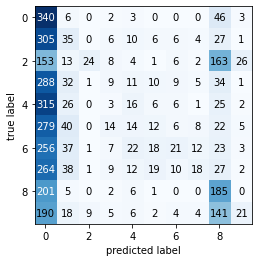

In [69]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()